# Pure Python evaluation of vector norms

Generate a list of random floats of a given dimension (dim), and store its result in the variable `vec`.

In [48]:
# This is used for plots and numpy
%pylab inline 

import random
dim = int(10)

vec = list()
for i in range(dim):
    vec.append(random.uniform(1,100))
    
vec

Populating the interactive namespace from numpy and matplotlib


/home/ginevracoal/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rand', 'sin', 'test', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


[12.301515212318625,
 94.88484712362767,
 25.562239478607722,
 39.20771820979889,
 76.47565281099865,
 78.52729802400721,
 57.29699974293108,
 43.84037240110619,
 61.00319493745407,
 60.45586316116731]

In [8]:
# check if the numbers are floats
from numpy.testing import *

assert_equal(type(vec), list)
assert_equal(len(vec), dim)
for ob in vec:
    assert_equal(type(ob), float)

Write a function that evaluates the $l_p$ norm of a vector in $R^d$. We remind:
$$
\|v \|_{p} := \left(\sum_i (v_i)^p\right)^{1/p}
$$

the function should take as arguments a `list`, containing your $R^d$ vector, and a number `p` in the range $[1, \infty]$, indicating the exponent of the norm. 

**Note:** an infinite float number is given by `float("inf")`.

Throw an assertion (look it up on google!) if the exponent is not in the range you expect.

In [9]:
def p_norm(vector,p):
    assert(p>=1), "wrong value for p"
    sum=0
    for i in range(len(vector)):
        sum += (vector[i]) ** p
    root = sum ** (1./p)
    return root    

In [10]:
# check the code
assert_equal(p_norm(range(10),1), 45.0)
assert_equal(p_norm([3,4], 2), 5.0)

In [11]:
assert_equal(p_norm([-1,-.5,.5], float("inf")), 1)

In [12]:
assert_raises(AssertionError, p_norm, [2,3], 0)
assert_raises(AssertionError, p_norm, [2,3], -1)

# Playing with condition numbers


In this exercise you will have to figure out what are the optimal
values of the stepping interval when approximating derivatives using
the finite difference method. See here_ for a short introduction on
how to run these programs on SISSA machines.

## 1. Finite differences
Write a program to compute the finite difference (`FD`)
approximation of the derivative of a function `f`, computed at
point `x`, using a stepping of size `h`. Recall the definition of
approximate derivative:

$$
FD(f,x,h) := \frac{f(x+h)-f(x)}{h}
$$

In [13]:
def FD(f, x, h):
    return (f(x+h)-f(x))/h

In [14]:
assert_equal(FD(lambda x: x, 0, .125), 1.0)

## 2. Compute FD

Evaluate this function for the derivative of `sin(x)` evaluated at `x=1`, for values of `h` equal to `1e-i`, with `i=0,...,20`. Store the values of the finite differences in the list `fd1`.

In [15]:
from math import sin
fd1 = list()
for i in range(21):
    fd1.append(FD(sin, 1, 10**(-i)))

In [16]:
assert_equal(len(fd1), 21)
expected = [0.067826442017785205, 0.49736375253538911, 0.53608598101186899, 0.5398814803603269, 0.54026023141862112, 0.54029809850586474, 0.54030188512133037, 0.54030226404044868, 0.54030229179602429, 0.54030235840940577, 0.54030224738710331, 0.54030113716407868, 0.54034554608506369, 0.53956838996782608, 0.53290705182007514, 0.55511151231257827, 0.0, 0.0, 0.0, 0.0, 0.0]
assert_almost_equal(fd1,expected,decimal=4)

AssertionError: 
Arrays are not almost equal to 4 decimals

(mismatch 4.761904761904759%)
 x: array([0.0678, 0.4974, 0.5361, 0.5399, 0.5403, 0.5403, 0.5403, 0.5403,
       0.5403, 0.5403, 0.5403, 0.5403, 0.5403, 0.5396, 0.544 , 0.5551,
       0.    , 0.    , 0.    , 0.    , 0.    ])
 y: array([0.0678, 0.4974, 0.5361, 0.5399, 0.5403, 0.5403, 0.5403, 0.5403,
       0.5403, 0.5403, 0.5403, 0.5403, 0.5403, 0.5396, 0.5329, 0.5551,
       0.    , 0.    , 0.    , 0.    , 0.    ])

## 3. Error plots

Plot the error, defined as `abs(FD-cos(1.0))` where `FD` is your approximation, in `loglog` format and explain what you see. A good way to emphasize the result is to give the option `'-o'` to the plot command.

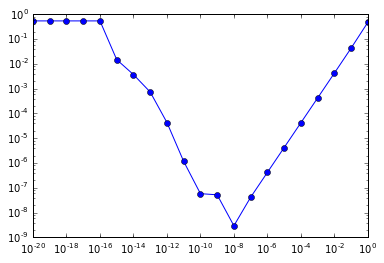

In [30]:
values_fd1 = [10**(-i) for i in range(21)]
errors_fd1 = abs(fd1-cos(1.0))

_ = plt.loglog(values_fd1, values_fd1, '-o', basex=10, basey=10)

The error is stable for $h\leq 10^{-16}$, reaches its lowest value for $h=10^{-8}$ and then linearly increases.

## 4. Error plots base 2
Repeate step 2 and 3 above, but using powers of `2` instead of powers of `10`, i.e., using `h` equal to `2**(-i)` for `i=1,...,60`. Do you see differences? How do you explain these differences? Shortly comment.  A good way to emphasize the result is to give the option `'-o'` to the plot command.

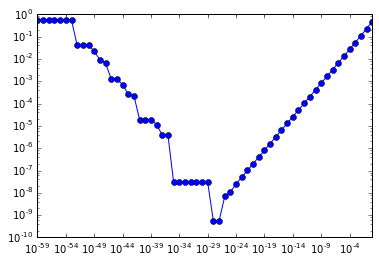

In [32]:
from math import sin
fd2 = list()
for i in range(60):
    fd2.append(FD(sin, 1, 2**(-i)))

values_fd2 = [10**(-i) for i in range(60)]
errors_fd2 = abs(fd2-cos(1.0))

_ = plt.loglog(values_fd2, errors_fd2, '-o', basex=10, basey=10)

YOUR ANSWER HERE

YOUR ANSWER HERE

## 5. Central Finite Differences
Write a function that computes the central finite difference approximation (`CFD`), defined as 

$$
CFD(f,x,h) := \frac{f(x+h)-f(x-h)}{2h}
$$


In [34]:
def CFD(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)

In [35]:
assert_equal(CFD(lambda x: x**2, 0.0, .5), 0.0)
assert_equal(CFD(lambda x: x**2, 1.0, .5), 2.0)

## 6. Error plots for CFD

Repeat steps 2., 3. and 4. and explain what you see. What is the *order* of the approximation 1. and what is the order of the approximation 5.? What's the order of the cancellation errors? 

In [38]:
# 2.
from math import sin
cfd1 = list()
for i in range(21):
    cfd1.append(CFD(sin, 1, 10**(-i)))

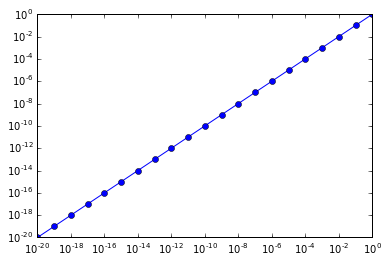

In [40]:
# 3.
values_cfd1 = [10**(-i) for i in range(21)]
errors_cfd1 = abs(cfd1-cos(1.0))

_ = plt.loglog(values_cfd1, values_cfd1, '-o', basex=10, basey=10)

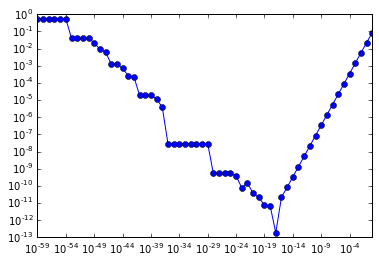

In [41]:
# 4.
from math import sin
cfd2 = list()
for i in range(60):
    cfd2.append(CFD(sin, 1, 2**(-i)))

values_cfd2 = [10**(-i) for i in range(60)]
errors_cfd2 = abs(cfd2-cos(1.0))

_ = plt.loglog(values_cfd2, errors_cfd2, '-o', basex=10, basey=10)


Both finite difference method (1.) and central finite different method (5.) are approximation methods for first order derivatives.

The cancellation error for method 1 is of order $O(h)$, while for method 5 it's $O(h^2)$. 

# Numpy

Numpy provides a very powerful array container. The first line of this ipython notebook has imported all of numpy functionalities in your notebook, just as if you typed::

    from numpy import *
    
Create a numpy array whith entries that range form 0 to 64. Use the correct numpy function to do so. Call it `x`. 

In [46]:
x = arange(64)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [50]:
assert_equal(type(x), ndarray)
assert_equal(len(x), 64)
for i in range(64):
    assert_equal(x[i], float(i))

Reshape the one dimensional array, to become a 4 rows 2 dimensional array, let numpy evaluate the correct number of culumns. Call it `y`.

In [57]:
y = x.reshape(4,-1)
y

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]])

In [58]:
assert_equal(shape(y), (4,16))

Get the following *slices* of `y`:

* All the rows and the first three colums. Name it `sl1`.
* All the colums and the first three rows. Name it `sl2`.
* Third to sixth (included) columns and all the rows. Name it `sl3`.
* The last three columns and all the rows. Name it `sl4`.

In [65]:
sl1 = y[:,:3]
sl2 = y[:3,:]
sl3 = y[:,3:7]
sl4 = y[:,-3:]

In [66]:
assert_equal(sl1,[[0,1,2],[16,17,18],[32,33,34],[48,49,50]])
assert_equal(sl2,[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],[16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],[32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47]])
assert_equal(sl3,[[3,4,5,6],[19,20,21,22],[35,36,37,38],[51,52,53,54]])
assert_equal(sl4,[[13,14,15],[29,30,31],[45,46,47],[61,62,63]])

Now reshape the array, as if you wanted to feed it to a fortran routine. Call it `z`.

In [67]:
z = y.reshape((4, -1), order="F")
z

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]])

Comment on the result, what has changed with respect to `y`? 

C has row-major order, while Fortran has column-major order.

Set the fourth element of `x` to 666666, and print `x`, `y`, `z`. Comment on the result

In [74]:
x[4] = 666
print(x, "\n\n", y,"\n\n", z)

[  0   1   2   3 666   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63] 

 [[  0   1   2   3 666   5   6   7   8   9  10  11  12  13  14  15]
 [ 16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31]
 [ 32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47]
 [ 48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63]] 

 [[  0   1   2   3 666   5   6   7   8   9  10  11  12  13  14  15]
 [ 16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31]
 [ 32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47]
 [ 48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63]]


Each time I'm accessing the fourth element (row-wise or column-wise depending on cases).

## Arrays and Matrices

Define 2 arrays, `A` of dimensions (2,3) and `B` of dimension (3,4).

* Perform the operation `C = A.dot(B)`. Comment the result, or the error you get.

In [78]:
A = arange(6).reshape(2,3)
B = arange(12).reshape(3,4)
C = A.dot(B)
print(A, " \n *", B, "\n\n =", C)

[[0 1 2]
 [3 4 5]]  
 * [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 

 = [[20 23 26 29]
 [56 68 80 92]]


In [79]:
assert_equal(A.shape,(2,3))
assert_equal(B.shape,(3,4))
assert_equal(C.shape,(2,4))
expected = sum(A[1,:]*B[:,2])
assert_equal(C[1,2],expected)

* Perform the operation `C = A*(B)`. Comment the result, or the error you get.

In [81]:
C = A*B 

ValueError: operands could not be broadcast together with shapes (2,3) (3,4) 

I cannot multiply arrays.

 * Convert A and B, from arrays to matrices and perform `A*B`. Comment the result.

In [83]:
A = asmatrix(A)
B = asmatrix(B)
C = A*B
print(C)

[[20 23 26 29]
 [56 68 80 92]]


In [84]:
assert_equal(type(A),numpy.matrixlib.defmatrix.matrix)
assert_equal(type(B),numpy.matrixlib.defmatrix.matrix)
assert_equal(type(C),numpy.matrixlib.defmatrix.matrix)
assert_equal(A.shape,(2,3))
assert_equal(B.shape,(3,4))
assert_equal(C.shape,(2,4))
expected = sum(A[1,:]*B[:,2])
assert_equal(C[1,2],expected)

# Playing with polynomials

The polynomial `(1-x)^6` can be expanded to::
     
     x^6 - 6*x^5 + 15*x^4 - 20*x^3 + 15*x^2 - 6*x + 1

   The two forms above are equivalent from a mathematical point of
   view, but may yield different results in a computer machine.

   Compute and plot the values of this polynomial, using each of the
   two forms, for 101 equally spaced points in the interval
   `[0.995,1.005]`, i.e., with a spacing of 0.0001 (use linspace).
   
   Can you explain this behavior?


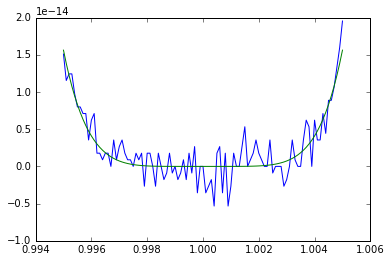

In [88]:
points = linspace(.995, 1.005, 101)
polynomial = lambda x: x**6 - 6*(x**5) + 15*(x**4) - 20*(x**3) + 15*(x**2) - 6*x + 1

_ = plot(points,[polynomial(x) for x in points])
_ = plot(points,[((1-x)**6) for x in points] )
show()

**Playing with interpolation in python**

1. Given a set of $n+1$ points $x_i$ as input (either a list of floats, or a numpy array of floats), construct a function `lagrange_basis(xi,i,x)` that returns the $i$-th Lagrange
polynomial associated to $x_i$, evaluated at $x$. The $i$-th Lagrange polynomial is defined as polynomial of degree $n$ such that $l_i(x_j) = \delta_{ij}$, where $\delta$ is one if $i == j$ and zero otherwise.
   
Recall the mathematical definition of the $l_i(x)$ polynomials:

$$
l_i(x) := \prod_{j=0, j\neq i}^{n} \frac{x-x_j}{x_i-x_j}
$$


In [144]:
def lagrange_basis(xi, i, x):
    assert(-1<i and i<len(xi)), "wrong value for i"
    x_i = xi[i]
    l_i = 1.
    for j, x_j in enumerate(xi):
        if j != i:
            l_i *= (x-x_j)/(x_i-x_j)
        else:
            continue
    return l_i

In [142]:
x = linspace(0,1,5)
d = 3
xi = linspace(0,1,d)

lagrange_basis(xi, 0, 3) #restituisce il valore assunto da l_i nei 5 punti dell lista x

10.0

In [176]:
x = linspace(0,1,5)
d = 3
xi = linspace(0,1,d)

assert_equal(list(lagrange_basis(xi, 0, x)),[1.0, 0.375, -0.0, -0.125, 0.0])
assert_equal(list(lagrange_basis(xi, 1, x)),[0.0, 0.75, 1.0, 0.75, -0.0])
assert_equal(list(lagrange_basis(xi, 2, x)),[-0.0, -0.125, 0.0, 0.375, 1.0])

assert_raises(AssertionError, lagrange_basis, xi, -1, x)
assert_raises(AssertionError, lagrange_basis, xi, 10, x)

Construct the function `lagrange_interpolation(xi,g)` that, given the set of interpolation points `xi` and a function `g`, it returns **another function** that when evaluated at **x** returns the Lagrange interpolation polynomial of `g` defined as 

$$
 \mathcal{L} g(x) := \sum_{i=0}^n g(x_i) l_i(x)
$$

You could use this function as follows::

    Lg = lagrange_interpolation(xi, g)
    xi = linspace(0,1,101)
    plot(x, g(x))
    plot(x, Lg(x))
    plot(xi, g(xi), 'or')

In [172]:
def lagrange_interpolation(xi,f):
    def func(x, xi, f):
        sum = 0
        for j, x_j in enumerate(xi):
            sum += f(x_j)*lagrange_basis(xi, j, x)
        return sum
    return lambda x: func(x, xi, f)

In [178]:
def lagrange_interpolation(xi,f):
    sum = 0
    for j, x_j in enumerate(xi):
        sum += f(x_j)*lagrange_basis(xi, j, x)
    return lambda x: sum

In [179]:
# Check for polynomials. This should be **exact**
g = lambda x: x**3+x**2

xi = linspace(0,1,4)
Lg = lagrange_interpolation(xi, g)

x = linspace(0,1,1001)

assert p_norm(g(x) - Lg(x),float('inf')) < 1e-15, 'This should be zero...'

AssertionError: This should be zero...